Problem statement:-
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

Steps:-              
1.Reading, understanding and visualising the data      
2.Preparing the data for modelling      
3.Building the model     
4.Evaluate the model      

In [1]:
#Importing libraries
import pandas as pd
import numpy as np   
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline


##### Reading Understanding Data

In [2]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
df.shape

(99999, 226)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


##### Handling Missing Values

In [5]:
#Checking any missing values in columns

df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [6]:
df.isnull().any()

mobile_number     False
circle_id         False
loc_og_t2o_mou     True
std_og_t2o_mou     True
loc_ic_t2o_mou     True
                  ...  
aon               False
aug_vbc_3g        False
jul_vbc_3g        False
jun_vbc_3g        False
sep_vbc_3g        False
Length: 226, dtype: bool

In [7]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

features_with_na

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',

In [8]:
print(len(features_with_na))

166


so., 166 columns are null  columns

In [9]:
#Finding % of missing values in each column

for feature in features_with_na:
    print(feature,"=",np.round(df[feature].isnull().mean()*100,3),"% missing values")

loc_og_t2o_mou = 1.018 % missing values
std_og_t2o_mou = 1.018 % missing values
loc_ic_t2o_mou = 1.018 % missing values
last_date_of_month_7 = 0.601 % missing values
last_date_of_month_8 = 1.1 % missing values
last_date_of_month_9 = 1.659 % missing values
onnet_mou_6 = 3.937 % missing values
onnet_mou_7 = 3.859 % missing values
onnet_mou_8 = 5.378 % missing values
onnet_mou_9 = 7.745 % missing values
offnet_mou_6 = 3.937 % missing values
offnet_mou_7 = 3.859 % missing values
offnet_mou_8 = 5.378 % missing values
offnet_mou_9 = 7.745 % missing values
roam_ic_mou_6 = 3.937 % missing values
roam_ic_mou_7 = 3.859 % missing values
roam_ic_mou_8 = 5.378 % missing values
roam_ic_mou_9 = 7.745 % missing values
roam_og_mou_6 = 3.937 % missing values
roam_og_mou_7 = 3.859 % missing values
roam_og_mou_8 = 5.378 % missing values
roam_og_mou_9 = 7.745 % missing values
loc_og_t2t_mou_6 = 3.937 % missing values
loc_og_t2t_mou_7 = 3.859 % missing values
loc_og_t2t_mou_8 = 5.378 % missing values
loc_og

In [10]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
date_of_last_rech_data_6,74.85
total_rech_data_6,74.85
max_rech_data_6,74.85
count_rech_2g_6,74.85
av_rech_amt_data_6,74.85
...,...
aon,0.00
aug_vbc_3g,0.00
jul_vbc_3g,0.00
jun_vbc_3g,0.00


In [11]:
#List the columns which are having more than 30% of missing values

col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])
col_list_missing_30

['date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'av_rech_amt_data_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'fb_user_6',
 'night_pck_user_6',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'max_rech_data_7',
 'total_rech_data_7',
 'arpu_2g_7',
 'date_of_last_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'fb_user_7',
 'night_pck_user_7',
 'arpu_2g_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_3g_9',
 'count_rech_2g_9',
 'fb_user_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'date_of_last_rech_data_8',
 'av_rech_amt_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'count_rech_2g_8']

In [12]:
df.shape

(99999, 226)

In [13]:
#Dropping the cols which are having more than 30% of missing values

df = df.drop(col_list_missing_30,axis=1)

df.shape

(99999, 186)

In [14]:
#Deleting the Date columns which are not required in our analysis

date_cols = [k for k in df.columns.to_list() if 'date' in k] 
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [15]:
#Dropping the date columns
df = df.drop(date_cols,axis = 1)
df.shape

(99999, 178)

In [16]:
#Dropping the circle column as this column has only one unique value. hence there will no inpact in data analysis

df = df.drop("circle_id",axis =1)
df.shape

(99999, 177)

##### Filtering High Value of Customers

In [17]:
# Creating column of avg_rech_amount by summing up total recharge amount of month 6 and 7. then taking the average of the sum

df["avg_rech_amnt_6_7"] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2


In [18]:
#finding 70th perecentile of the avg_rech_amt_6_7

x = df[['avg_rech_amnt_6_7']].quantile(0.7)
x

avg_rech_amnt_6_7    368.5
Name: 0.7, dtype: float64

70 % of people are intrested in recharging below 368 rs

In [19]:
x=int(x)
print(x,type(x))

368 <class 'int'>


In [20]:
#filter the customers who have reacharged more than or equal to x

df = df[df["avg_rech_amnt_6_7"] >= x]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amnt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [21]:
#After making 70th percentile people 
df.shape

(30078, 178)

Data is reduced from 99999 ---> 30078 rows after making 70th percentile

##### Handling Missing Values

In [22]:
#Count the rows having more than 50% of missing values

df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns) // 2)]
df_missing_rows_50

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amnt_6_7
2185,7000237332,NaN,NaN,NaN,386.514,386.506,386.491,386.493,NaN,NaN,...,0,0,0,0,882,172.71,657.55,9.22,0.0,455.0
3506,7002324263,NaN,NaN,NaN,996.558,0.000,0.000,0.000,NaN,NaN,...,0,0,0,0,2033,0.00,0.00,0.00,0.0,437.5
4190,7000293582,NaN,NaN,NaN,2502.516,0.000,0.000,0.000,NaN,NaN,...,0,0,0,0,266,0.00,0.00,303.54,0.0,1277.5
5220,7000635396,NaN,NaN,NaN,427.619,213.786,213.799,427.587,NaN,NaN,...,0,0,0,0,1112,0.00,0.00,0.00,0.0,378.0
5539,7001126462,NaN,NaN,NaN,249.000,243.106,374.000,770.397,NaN,NaN,...,0,0,0,0,3057,0.00,0.00,0.00,0.0,549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96449,7000343105,NaN,NaN,NaN,314.000,331.000,342.000,137.000,NaN,NaN,...,0,0,0,0,303,0.00,0.00,0.00,0.0,550.0
96494,7001923811,NaN,NaN,NaN,213.818,427.645,213.804,427.586,NaN,NaN,...,0,0,0,0,873,0.00,349.77,0.00,0.0,378.0
97608,7000444267,NaN,NaN,NaN,429.759,386.505,386.500,0.000,NaN,NaN,...,1,0,0,0,385,490.42,464.88,791.22,0.0,480.5
97804,7002369377,NaN,NaN,NaN,856.801,0.000,558.013,427.605,NaN,NaN,...,0,0,0,1,528,635.13,435.64,0.00,0.0,504.0


In [23]:
df_missing_rows_50.shape

(114, 178)

In [24]:
#Delete the customers having more than 50% of missing Data
df = df.drop(df_missing_rows_50.index)
df.shape

(29964, 178)

In [25]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
onnet_mou_9,5.33
offnet_mou_9,5.33
loc_og_t2f_mou_9,5.33
loc_og_t2c_mou_9,5.33
std_og_t2t_mou_9,5.33
...,...
aug_vbc_3g,0.00
jul_vbc_3g,0.00
jun_vbc_3g,0.00
sep_vbc_3g,0.00


Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together.

In [26]:
#Listing the columns of MOU sep(9)

print(((df_missing_columns[df_missing_columns["null"] == 5.33]).index).tolist())

['onnet_mou_9', 'offnet_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_og_t2t_mou_9', 'loc_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'roam_og_mou_9', 'roam_ic_mou_9', 'loc_ic_t2t_mou_9', 'isd_og_mou_9', 'og_others_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'std_og_t2m_mou_9', 'std_ic_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2t_mou_9', 'isd_ic_mou_9', 'spl_ic_mou_9', 'ic_others_9']


In [27]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amnt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [28]:
df_null_mou_9.shape

(1598, 178)

In [29]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [30]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
onnet_mou_8,0.56
offnet_mou_8,0.56
loc_og_t2f_mou_8,0.56
loc_og_t2c_mou_8,0.56
std_og_t2t_mou_8,0.56
...,...
aug_vbc_3g,0.00
jul_vbc_3g,0.00
jun_vbc_3g,0.00
sep_vbc_3g,0.00


Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [31]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.56]).index).to_list())

['onnet_mou_8', 'offnet_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'loc_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'roam_og_mou_8', 'roam_ic_mou_8', 'loc_ic_t2t_mou_8', 'isd_og_mou_8', 'og_others_8', 'spl_og_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'std_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_ic_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8', 'isd_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8']


In [32]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amnt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
692,7000361726,0.0,0.0,0.0,276.209,332.035,0.0,2.250,264.33,54.39,...,0,0,0,0,281,0.0,0.0,0.0,0.0,368.0
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5


In [33]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [34]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
offnet_mou_6,0.44
onnet_mou_6,0.44
roam_ic_mou_6,0.44
loc_og_mou_6,0.44
std_og_t2m_mou_6,0.44
...,...
aug_vbc_3g,0.00
jul_vbc_3g,0.00
jun_vbc_3g,0.00
sep_vbc_3g,0.00


Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together

In [35]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['offnet_mou_6', 'onnet_mou_6', 'roam_ic_mou_6', 'loc_og_mou_6', 'std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2t_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 'spl_og_mou_6', 'loc_ic_t2t_mou_6', 'og_others_6', 'std_og_mou_6', 'isd_og_mou_6', 'std_og_t2c_mou_6', 'std_og_t2f_mou_6', 'spl_ic_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'loc_ic_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_6', 'loc_ic_t2m_mou_6', 'isd_ic_mou_6', 'ic_others_6']


In [36]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amnt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [37]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [38]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
offnet_mou_7,0.12
onnet_mou_7,0.12
roam_ic_mou_7,0.12
loc_og_mou_7,0.12
std_og_t2m_mou_7,0.12
...,...
aug_vbc_3g,0.00
jul_vbc_3g,0.00
jun_vbc_3g,0.00
sep_vbc_3g,0.00


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [39]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['offnet_mou_7', 'onnet_mou_7', 'roam_ic_mou_7', 'loc_og_mou_7', 'std_og_t2m_mou_7', 'std_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2t_mou_7', 'roam_og_mou_7', 'loc_og_t2c_mou_7', 'spl_og_mou_7', 'loc_ic_t2t_mou_7', 'og_others_7', 'std_og_mou_7', 'isd_og_mou_7', 'std_og_t2c_mou_7', 'std_og_t2f_mou_7', 'spl_ic_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'loc_ic_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2m_mou_7', 'loc_ic_t2m_mou_7', 'isd_ic_mou_7', 'ic_others_7']


In [40]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amnt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [41]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [42]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
loc_og_t2o_mou,0.0
std_og_t2o_mou,0.0
loc_ic_t2o_mou,0.0
arpu_6,0.0
...,...
aug_vbc_3g,0.0
jul_vbc_3g,0.0
jun_vbc_3g,0.0
sep_vbc_3g,0.0


We can see there are no more missing values in any columns.

In [43]:
df.shape

(28048, 178)

In [44]:
#Checking percentage of data we lost while dealing with missing values (30078 total records before handling with missing values)

round((1-(len(df.index)/30078)),2) 

0.07

So., we lost almost 7% of data

##### Tag churners                        
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [45]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [46]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amnt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


In [47]:
#Deleting all attributes corresponding to Churn phase

col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [48]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [49]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

##### Checking Churn Percentage

In [50]:
round(100*(df['churn'].mean()),2)

np.float64(3.39)

There is very little percentage of churn rate. We will take care of the class imbalance later.

#### Outlier Treatment

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [51]:
df['moile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28048 entries, 8 to 99997
Columns: 137 entries, mobile_number to moile_number
dtypes: float64(109), int64(26), object(2)
memory usage: 29.5+ MB


In [53]:
#List only Numeric columns

numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['mobile_number', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amnt_6_7'],
      dtype='object', length=135)


In [54]:
numeric_cols.shape

(135,)

In [55]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]



In [56]:
data.shape

(27762, 137)

##### Derive New Features

In [57]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [58]:
#Deriving new column decrease_mou_action
#This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [59]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [60]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [61]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amnt_6_7,churn,moile_number,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,21.03,910.65,122.16,519.0,0,7001524846,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,0.00,0.00,380.0,0,7002191713,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,0.00,2.45,21.89,459.0,0,7000875565,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,0.00,408.0,0,7000187447,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,0.00,0.00,640.0,0,7002124215,1067.43,1245.130,177.700,0


##### Deriving new column decrease_rech_num_action

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase

In [62]:
#Avg recharge Number 

data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_amt_8']) / 2

In [63]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [64]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,avg_rech_amnt_6_7,churn,moile_number,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,519.0,0,7001524846,612.22,324.125,-288.095,1,70.5,51.5,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,380.0,0,7002191713,1875.70,1262.390,-613.310,1,360.5,354.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,459.0,0,7000875565,711.67,597.705,-113.965,1,83.0,73.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,408.0,0,7000187447,1341.41,1.560,-1339.850,1,16.0,-3.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,640.0,0,7002124215,1067.43,1245.130,177.700,0,372.0,350.0,0


Deriving new column decrease_rech_amt_action                                 
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [65]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

Deriving new column decrease_arpu_action                                          
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [66]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [67]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,70.5,51.5,0,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,360.5,354.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,83.0,73.0,0,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,16.0,-3.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,372.0,350.0,0,699.0,99.0,0,617.7565,103.3035,0


Deriving new column decrease_vbc_action                            
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [68]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

### EDA

Univariate Analysis

In [69]:
#Converting Churn column to int type in order to do aggregation function

data["churn"] = data["churn"].astype('int64')


In [73]:
list(data.columns)

['mobile_number',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mo

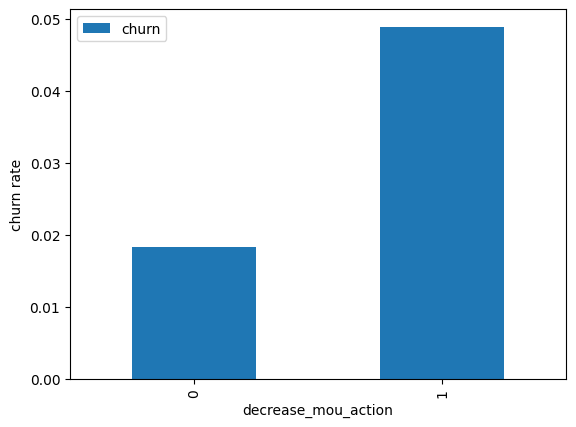

In [75]:
#Pivot table

data.pivot_table(values="churn",index='decrease_mou_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

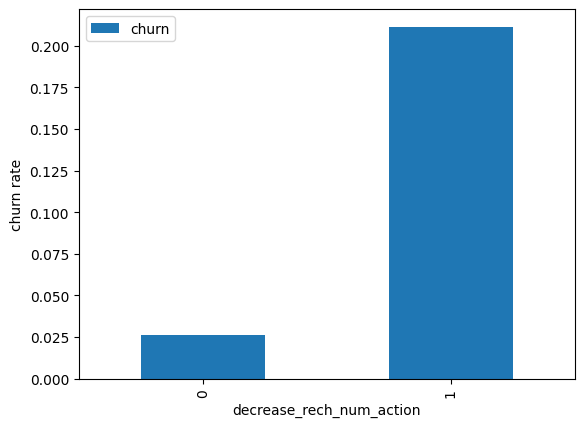

In [76]:
#Churn rate on the basis wheather the customer dercreased her/his number of reacharge in action month

data.pivot_table(values="churn",index='decrease_rech_num_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.



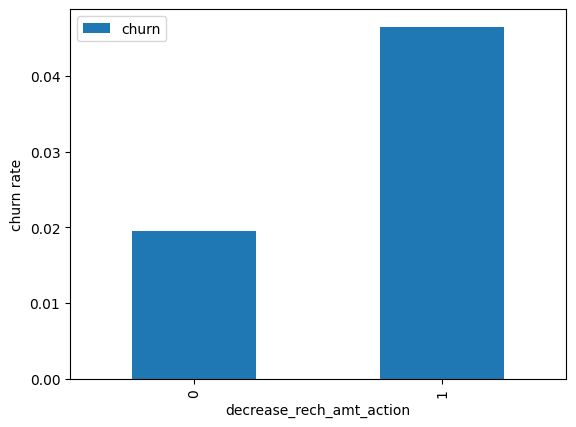

In [77]:
#Churn rate on the basis of wheather the customer decreased her/his amount of reacharge in action month

data.pivot_table(values="churn",index='decrease_rech_amt_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

In [78]:
#Analysis of average revenue per customer(churn and not churn) in the action phase

#creating churn dataframe
data_churn = data[data['churn']==1]

#Creating non-churn dataframe

data_non_churn = data[data['churn']==0]

[Text(0.5, 0, 'Action phase ARPU')]

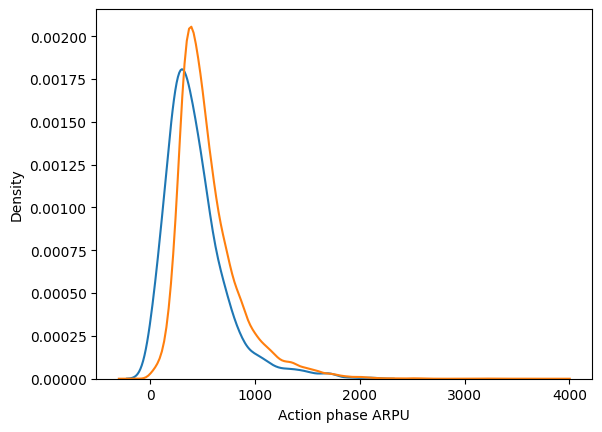

In [79]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

### Bivariate Analysis

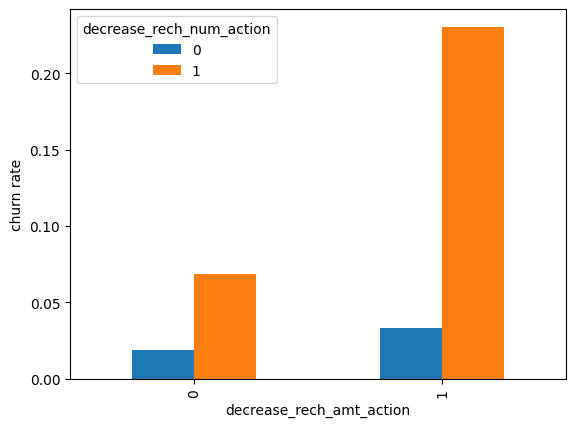

In [80]:
#Analysis of churn rate by the decreasing reacharge amount and the number of reacharge in the action phase
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

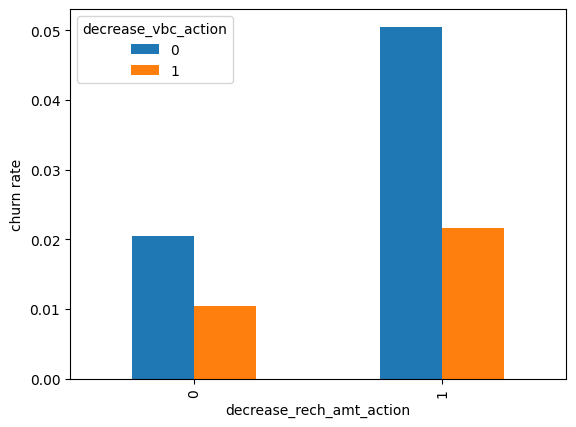

In [81]:
#Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

In [82]:
#Analysis of recharge amount and number of recharge in action month
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data=data)


TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 1000x600 with 0 Axes>

In [84]:
#Dropping few derived columns, which are not required in further analysis

data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc'], axis=1)

## Train - Test Split

In [85]:
from sklearn.model_selection import train_test_split
X=data.drop(['mobile_number','churn'],axis = 1)
y=data['churn']

In [86]:
#Splitting Data

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

#### Dealing With Imbalance Data

In [87]:
# We are creating synthetic samples  by doing upsampling using SMOTE(synthetic minority oversampling techniq)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)

In [89]:
#fitting Smote to the train test split

X_train,y_train = sm.fit_resample(X_train,y_train)

  File "c:\Users\BairaM\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\BairaM\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\BairaM\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
             

In [91]:
X_train.shape


(42942, 140)

In [92]:
y_train.shape

(42942,)

In [93]:
X_test.shape

(5553, 140)

### Feature Scaling

In [94]:
# Standardization method

from sklearn.preprocessing import StandardScaler

In [95]:
# instantiate the scaler

scaler = StandardScaler()

In [96]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [97]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amnt_6_7,moile_number,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.219550,0.186694,0.485672,-0.752893,-0.775096,-0.586463,1.656626,...,-0.264045,-0.271144,-0.267373,0.112685,-0.504684,1,0,1,1,0
1,0.0,0.0,0.0,2.013339,2.712071,3.496319,0.394327,0.639911,1.187187,0.455213,...,0.955356,0.336004,0.303491,3.058582,1.042599,0,0,0,0,0
2,0.0,0.0,0.0,2.045302,1.504017,1.419221,3.120529,2.707745,3.570423,0.588358,...,-0.264045,-0.271144,-0.267373,2.120933,0.966940,1,0,1,1,0
3,0.0,0.0,0.0,-0.392625,-0.988519,-0.099569,-0.309492,-0.415741,-0.201060,0.070542,...,-0.264045,-0.271144,-0.267373,-0.838959,-0.965863,1,0,1,1,0
4,0.0,0.0,0.0,-0.820476,-0.478452,-0.071640,-0.511856,0.097935,0.422698,-0.930605,...,-0.036116,0.023421,0.980614,-0.880943,1.252198,0,0,0,0,1


In [98]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amnt_6_7,moile_number,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
14155,0.0,0.0,0.0,-0.907472,-0.842846,-0.354921,-0.608114,-0.489143,-0.126899,-0.051953,...,-0.264045,-0.271144,-0.267373,-0.957914,-1.057612,0,0,1,1,0
36651,0.0,0.0,0.0,0.169845,0.083874,1.025927,-0.193785,-0.666805,-0.330722,1.101855,...,-0.264045,-0.271144,-0.267373,-0.282667,-0.745061,0,0,0,0,0
89875,0.0,0.0,0.0,0.825154,-0.214180,1.770071,-0.376253,-0.475218,0.773251,0.823864,...,0.593962,0.147721,-0.267373,0.203651,-0.813175,0,0,0,1,0
60940,0.0,0.0,0.0,-0.550188,-0.307196,-0.967636,-0.731855,-0.698185,-0.550312,0.627255,...,-0.264045,-0.271144,-0.267373,-0.662275,-0.498934,1,0,1,1,0
76618,0.0,0.0,0.0,0.089259,1.326696,1.239588,-0.556191,-0.355222,-0.073070,0.091338,...,-0.264045,-0.271144,-0.267373,1.407200,-1.533932,0,0,0,0,0


#### Modelling with PCA

In [99]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [100]:
pca.components_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.44092266e-02, -1.37052813e-02,  1.45791415e-02],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -9.56982350e-03, -8.06451700e-03, -1.20575530e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87052648e-02, -2.88076457e-02,  2.31792574e-02],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -1.50023986e-12, -2.80383755e-14,  3.65888433e-12],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.11204978e-12, -2.11374927e-13,  1.81607552e-12],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         3.44655295e-12, -1.49966968e-12, -4.85624919e-12]],
      shape=(140, 140))

In [101]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.10832778 0.18934021 0.24030792 0.28380156 0.32305492 0.35904058
 0.39367593 0.42334766 0.44862308 0.47350468 0.49580045 0.51726926
 0.5381354  0.55822414 0.57644934 0.59360295 0.60982588 0.62579062
 0.63954014 0.65283531 0.66568675 0.67832098 0.69009518 0.70080274
 0.71084476 0.72066899 0.73042054 0.73985999 0.74901139 0.75789288
 0.7665933  0.77508247 0.78312791 0.79061939 0.79797217 0.80505965
 0.81182582 0.81851567 0.82510096 0.83154118 0.83777314 0.84381338
 0.84969549 0.85523054 0.86066339 0.86582643 0.87083176 0.87563233
 0.88041449 0.88479019 0.88904143 0.89321727 0.89726267 0.90117987
 0.90503195 0.90886846 0.9126194  0.91625885 0.91979683 0.92310785
 0.92638083 0.92954231 0.93263769 0.93563607 0.9386119  0.94143925
 0.94418496 0.94685094 0.94946684 0.95203888 0.9545663  0.9569918
 0.95935013 0.96149485 0.96360831 0.96570048 0.96774803 0.96973512
 0.97166089 0.97352658 0.9753079  0.97704545 0.97864017 0.98021865
 0.98178789 0.98331306 0.98477721 0.98621214 0.98755445 0.98885

Text(0, 0.5, 'Cumulative Variance')

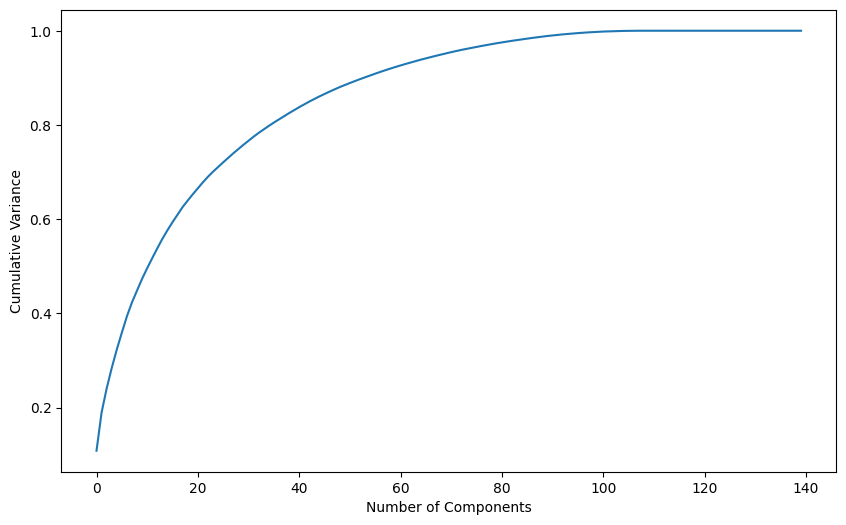

In [102]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

In [103]:
#Performing PCA with 60 components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)
X_train_pca = pca_final.fit_transform(X_train)

Applying transformation on the test set                               
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [104]:
X_test_pca = pca_final.transform(X_test)

##### Emphasize Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

## Logistic regression with PCA

In [105]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [106]:
#Tuning Hyperparameter

# C is the inverse of regularization strength in logistic regression. Higher values of C correspon to less regularization

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [107]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.238707,0.029775,0.008413,0.002245,0.01,{'C': 0.01},0.902573,0.897685,0.905094,0.896655,...,0.901693,0.003912,6,0.903896,0.901930,0.902399,0.901027,0.899720,0.901795,0.001392
1,0.269394,0.081901,0.005367,0.001079,0.10,{'C': 0.1},0.903764,0.899306,0.905327,0.898270,...,0.902579,0.003211,3,0.904186,0.903329,0.903273,0.901669,0.900245,0.902540,0.001407
2,0.177936,0.006313,0.004406,0.000423,1.00,{'C': 1},0.903287,0.899537,0.905094,0.898731,...,0.902529,0.002917,5,0.904417,0.903737,0.903506,0.902077,0.900536,0.902855,0.001387
3,0.187018,0.001752,0.003934,0.000164,10.00,{'C': 10},0.903049,0.900000,0.905327,0.898731,...,0.902667,0.002916,1,0.904475,0.903562,0.903506,0.902077,0.900711,0.902866,0.001323
4,0.180592,0.007777,0.004264,0.000266,100.00,{'C': 100},0.902573,0.900231,0.905327,0.898501,...,0.902572,0.002933,4,0.904417,0.903621,0.903564,0.901961,0.900770,0.902866,0.001317
5,0.187414,0.005673,0.004168,0.000293,1000.00,{'C': 1000},0.902811,0.900231,0.905327,0.898501,...,0.902620,0.002935,2,0.904417,0.903679,0.903622,0.901902,0.900770,0.902878,0.001339


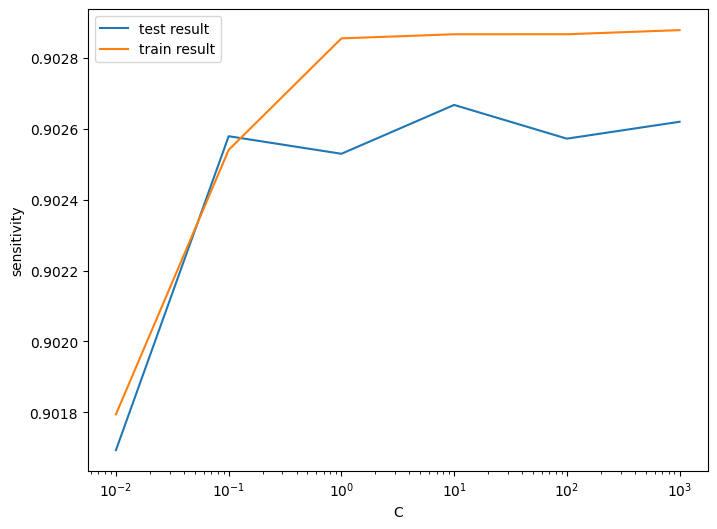

In [109]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')


In [110]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9026670883944341 at C = 10


#### Logistic regression with optimal C

In [111]:
logistic_pca = LogisticRegression(C=best_C)

log_pca_model = logistic_pca.fit(X_train_pca,y_train)

In [112]:
#prediction on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [113]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[18154  3317]
 [ 2089 19382]]


In [114]:
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))

# Specificity
print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.8741092636579573
Sensitivity:  0.9027059755018397
Specificity:  0.8455125518140748


In [115]:
#Prediction on test set

y_test_pred = log_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[4603  753]
 [  43  154]]


In [116]:
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))

# Specificity
print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.8566540608679993
Sensitivity:  0.7817258883248731
Specificity:  0.8594100074682599


##### Model summary                  

Train set                                
Accuracy = 0.87
Sensitivity = 0.90
Specificity = 0.84     

Test set                       
Accuracy = 0.85
Sensitivity = 0.78
Specificity = 0.85

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Support Vector Machine with PCA

In [117]:
from sklearn.svm import SVC

##### Hyper parameter tuning

C:- Regularization parameter                                                         
gamma ; Handles non-linear classification

In [118]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [119]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,20.624505,1.509318,11.797004,0.927427,1,0.0100,"{'C': 1, 'gamma': 0.01}",0.938592,0.948163,0.945298,0.944018,0.004011,5,0.951656,0.947394,0.949874,0.949641,0.001748
1,22.486462,0.473736,15.045544,0.066988,1,0.0010,"{'C': 1, 'gamma': 0.001}",0.888920,0.895836,0.891994,0.892250,0.002829,10,0.895452,0.891645,0.893845,0.893647,0.001561
2,28.568135,0.579241,19.613467,0.041065,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.862582,0.868870,0.866983,0.866145,0.002634,12,0.867123,0.866005,0.866215,0.866448,0.000485
3,17.755035,0.974863,7.881578,0.719362,10,0.0100,"{'C': 10, 'gamma': 0.01}",0.960458,0.968003,0.964860,0.964440,0.003094,3,0.976841,0.973313,0.974920,0.975024,0.001442
4,18.367840,0.320031,12.267750,0.332347,10,0.0010,"{'C': 10, 'gamma': 0.001}",0.913861,0.925388,0.919869,0.919706,0.004707,7,0.924794,0.919694,0.922349,0.922279,0.002083
5,24.125342,2.480228,16.169698,0.580753,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.876834,0.882493,0.881445,0.880257,0.002458,11,0.882073,0.879000,0.881270,0.880781,0.001302
6,31.103043,4.859862,5.399456,0.446346,100,0.0100,"{'C': 100, 'gamma': 0.01}",0.970798,0.975688,0.973522,0.973336,0.002001,2,0.991407,0.991162,0.991442,0.991337,0.000124
7,24.360772,1.111797,9.426797,0.161209,100,0.0010,"{'C': 100, 'gamma': 0.001}",0.934679,0.943901,0.941805,0.940129,0.003947,6,0.948861,0.944844,0.946241,0.946649,0.001665
8,20.026049,1.020113,14.441425,0.706049,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.891086,0.898910,0.895068,0.895021,0.003195,9,0.899050,0.894684,0.895592,0.896442,0.001881
9,39.191704,2.224767,4.166484,0.268539,1000,0.0100,"{'C': 1000, 'gamma': 0.01}",0.971287,0.976387,0.973872,0.973848,0.002082,1,0.998917,0.998463,0.998568,0.998649,0.000194


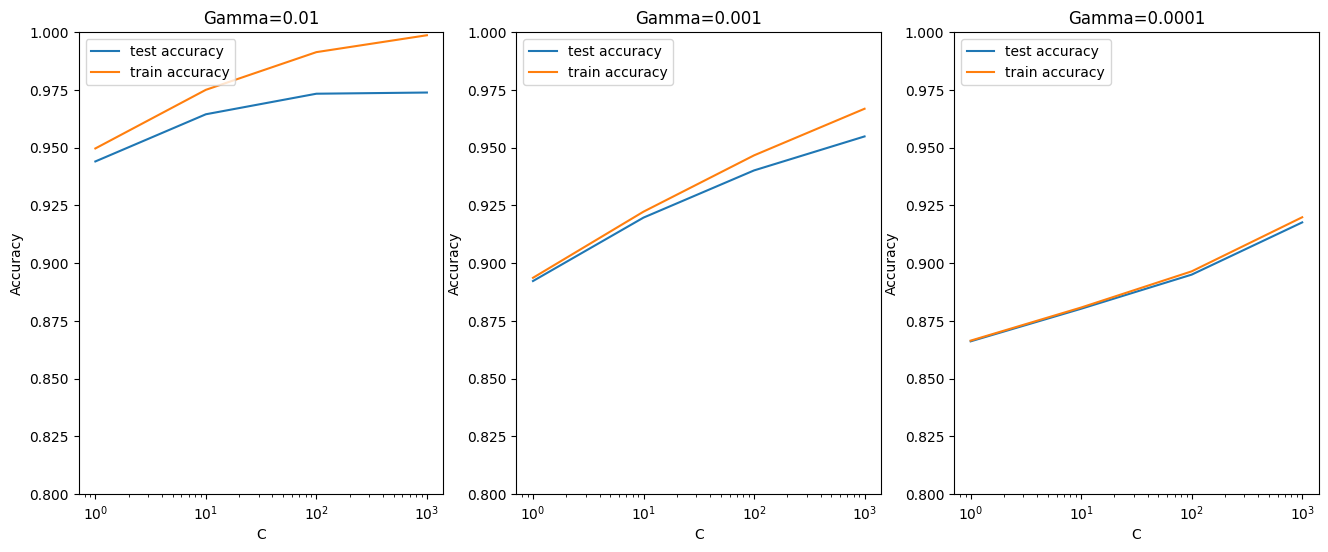

In [120]:
###Plotting the accuracy with various C and gamma values

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [121]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9738484467421173 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

Also, at C=100 we have a good accuracy and the train and test scores are comparable.

Though sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~90%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:

High gamma (i.e. high non-linearity) and average value of C
Low gamma (i.e. less non-linearity) and high value of C
We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

In [122]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on train and test data

In [123]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[18784  2687]
 [ 1616 19855]]
Accuracy:- 0.8997950724232686
Sensitivity:- 0.9247356900004657
Specificity:- 0.8748544548460715


In [124]:
# Predictions on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[4719  637]
 [  48  149]]
Accuracy:- 0.876643255897713
Sensitivity:- 0.7563451776649747
Specificity:- 0.8810679611650486


## Random Forest with PCA

In [125]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

#Hyper Parameter Tuning

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [126]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8394345861860183 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [127]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [129]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [130]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[17678  3793]
 [ 3030 18441]]
Accuracy:- 0.8411112663592754
Sensitivity:- 0.8588794187508733
Specificity:- 0.8233431139676773


In [131]:
# Predictions on the test set
y_test_pred = rfc_model.predict(X_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[4460  896]
 [  47  150]]
Accuracy:- 0.8301818836664866
Sensitivity:- 0.7614213197969543
Specificity:- 0.8327109783420463


#### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

#### Recomendations

1.Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).                                    
2.Target the customers, whose outgoing others charge in July and incoming others on August are less.                                                                             
3.Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide    offer.         
4.Cutomers, whose monthly 3G recharge in August is more, are likely to be churned.                                       
5.Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.                                   
6.Cutomers decreasing monthly 2g usage for August are most probable to churn.                                                 
7.Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.                                                    
8.roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.                     